  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


C:\Users\sorop\miniforge3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training neural network...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.9755 - loss: 0.0761 - val_accuracy: 0.9708 - val_loss: 0.1010
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9827 - loss: 0.0537 - val_accuracy: 0.9760 - val_loss: 0.0875
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9847 - loss: 0.0464 - val_accuracy: 0.9728 - val_loss: 0.0984
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9745 - val_loss: 0.1018
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9895 - loss: 0.0297 - val_accuracy: 0.9733 - val_loss: 0.1034
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9777 - val_loss: 0.0907
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9808 - val_loss: 0.0888
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14

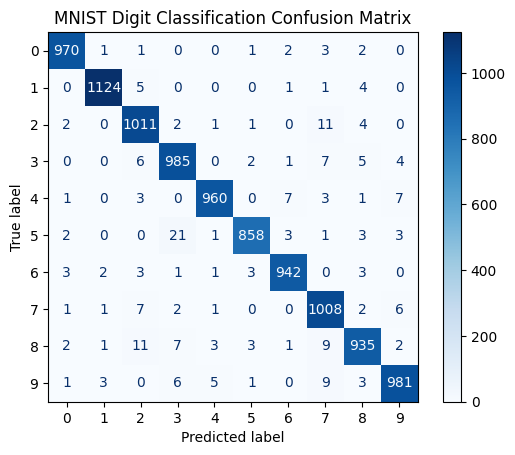

In [1]:
!pip install numpy matplotlib scikit-learn tensorflow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Download MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  # Convert labels to integers

# Split into train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training neural network...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("MNIST Digit Classification Confusion Matrix")
plt.show()

In [3]:
!cd


C:\Users\sorop


In [4]:
!git add Mnist.ipynb

In [5]:
!git commit -m "Initial commit of MNIST notebook"

[master 419acba] Initial commit of MNIST notebook
 1 file changed, 3 insertions(+), 96 deletions(-)


In [6]:
!git remote add origin https://github.com/soroel/mnist-algorithm.git

error: remote origin already exists.


In [7]:
!git remote -v

origin	https://github.com/soroel/mnist-algorithm.git (fetch)
origin	https://github.com/soroel/mnist-algorithm.git (push)
